In [0]:

from google.colab import drive

drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [0]:
main_path='/content/mydrive/My Drive/ProjectFYP/Epinions/'

### **Data Preprocessing**

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install python-igraph==0.7.1.post6
!pip install node2vec
import igraph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import KeyedVectors
from node2vec import Node2Vec
from tqdm import tqdm_notebook
from imblearn.over_sampling import RandomOverSampler
import igraph
from sklearn import preprocessing



**Dataset Read**

In [0]:
#epinions_ds=pd.read_csv(main_path+'dataset/epinions.csv',header=None)

In [0]:
#main dataset info
def print_dataset_info(df):
  df.columns=['source','target','sign']
  print(df.info())
  print(df.groupby('sign').count().div(df.source.count()).mul(100).round(1))
  return df

In [0]:
epinions_df=print_dataset_info(epinions_ds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841372 entries, 0 to 841371
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   source  841372 non-null  int64
 1   target  841372 non-null  int64
 2   sign    841372 non-null  int64
dtypes: int64(3)
memory usage: 19.3 MB
None
      source  target
sign                
-1      14.7    14.7
 1      85.3    85.3


**Train test Split**

In [0]:
def _test_train_split(df,random):
  X_train,X_test,y_train,y_test=train_test_split(df,df.sign,test_size=0.2,random_state=random)
  #print("Training Dataset Percentages:")
  #print(X_train.groupby('sign').count().div(X_train.source.count()).mul(100).round(1).astype(str)+'%')
  #print("Testing Dataset Percentage:")
  #print(X_test.groupby('sign').count().div(X_test.source.count()).mul(100).round(1).astype(str)+'%')
  return X_train,X_test,y_train,y_test


In [0]:
print("Enter Random State: ")
p=int(input())
training_source_target,testing_source_target,training_signs,testing_signs=_test_train_split(epinions_df,p)


Enter Random State: 
25


In [0]:
#saving split datasets

#training_source_target.to_csv(main_path+'dataset/X_train.csv',index=False)
#testing_source_target.to_csv(main_path+'dataset/x_test.csv',index=False)
#training_signs.to_csv(main_path+'dataset/Y_train.csv',index=False)
#testing_signs.to_csv(main_path+'dataset/y_test.csv',index=False)


###**Community Detection**

In [0]:
#loading splited Dataset and saving it into GML Graph format

def graph_loader():
  X_train=pd.read_csv(main_path+'dataset/X_train.csv')
  train_graph=nx.from_pandas_edgelist(X_train,source='source',target='target',create_using=nx.DiGraph())
  print("Total Edges: ",train_graph.number_of_edges())
  print("Total Nodes: ",train_graph.number_of_nodes())
  #nx.write_gml(train_graph,main_path+'others/train_graph.gml')
  print("Graph Saved as GML ")


In [0]:
graph_loader()

Total Edges:  673097
Total Nodes:  118244
Graph Saved as GML 


**Igraph ~ Community Detection**

In [0]:
#creating community using Newman's leading eigen vector method. 
# each split is done by maximizing the modularity regarding the original network.

def community_detection():
  train_igraph=igraph.Graph.Read_GML(main_path+'others/train_graph.gml')
  coms=train_igraph.community_leading_eigenvector(weights=None)
  return coms

In [0]:
coms=community_detection()
print(coms)

/usr/local/lib/python3.6/dist-packages/igraph/__init__.py:1072: RuntimeWarning: This method was developed for undirected graphs at community.c:1565
  membership, _, q = GraphBase.community_leading_eigenvector(self, clusters, **kwds)


Clustering with 118244 elements and 5615 clusters
[   0] 0, 1, 4, 5, 8, 9, 12, 13, 14, 16, 24, 25, 28, 32, 33, 34, 35, 36, 37,
       38, 39, 44, 45, 46, 48, 49, 50, 51, 54, 57, 58, 59, 64, 65, 68, 69, 70,
       71, 72, 73, 75, 77, 78, 79, 80, 81, 83, 84, 87, 93, 94, 95, 98, 99,
       100, 101, 102, 108, 111, 112, 116, 117, 118, 119, 120, 128, 129, 130,
       131, 132, 133, 134, 137, 139, 140, 141, 142, 143, 144, 146, 147, 153,
       155, 156, 157, 159, 160, 163, 164, 165, 167, 168, 170, 174, 176, 177,
       179, 180, 181, 182, 186, 188, 189, 190, 191, 194, 195, 196, 198, 199,
       202, 206, 212, 213, 214, 215, 216, 217, 220, 227, 228, 230, 231, 232,
       233, 234, 236, 238, 239, 240, 245, 246, 249, 250, 251, 253, 254, 257,
       258, 262, 263, 264, 265, 266, 267, 270, 271, 272, 273, 275, 276, 277,
       278, 279, 281, 284, 285, 286, 287, 288, 289, 290, 292, 293, 298, 299,
       300, 305, 313, 314, 316, 317, 320, 321, 322, 323, 324, 325, 326, 327,
       331, 332, 333, 334,

In [0]:

def saving_coms(com_obj):
  sub_graphs=com_obj.subgraphs()
  i=0
  print("Enter Total Number of Communities: ")
  c=int(input())
  while(i<c):
    com_num=int(input("Enter Community # : "))
    path=main_path+"communities/com_"+str(i)+".gml"
    #sub_graphs[com_num].write_gml(path)
    print("Community # "+str(com_num)+" saved in "+str(path))
    i=i+1
  print("\nAll communities saved ")

In [0]:
saving_coms(coms)

Enter Total Number of Communities: 
3
Enter Community # : 0
Community # 0 saved in /content/mydrive/My Drive/ProjectFYP/Epinions/communities/com_0.gml
Enter Community # : 5614
Community # 5614 saved in /content/mydrive/My Drive/ProjectFYP/Epinions/communities/com_1.gml
Enter Community # : 5613
Community # 5613 saved in /content/mydrive/My Drive/ProjectFYP/Epinions/communities/com_2.gml

All communities saved 


In [0]:
com_0_g=nx.read_gml(main_path+'communities/com_0.gml')
com_1_g=nx.read_gml(main_path+'communities/com_1.gml')
com_2_g=nx.read_gml(main_path+'communities/com_2.gml')

In [0]:
print('Number of Nodes in Community 0 : ',com_0_g.number_of_nodes())
print('Number of Edges in Community 0 : ',com_0_g.number_of_edges())
print('Number of Nodes in Community 1 : ',com_1_g.number_of_nodes())
print('Number of Edges in Community 1 : ',com_1_g.number_of_edges())
print('Number of Nodes in Community 2 : ',com_2_g.number_of_nodes())
print('Number of Edges in Community 2 : ',com_2_g.number_of_edges())

Number of Nodes in Community 0 :  79029
Number of Edges in Community 0 :  293156
Number of Nodes in Community 1 :  23316
Number of Edges in Community 1 :  186691
Number of Nodes in Community 2 :  3663
Number of Edges in Community 2 :  47564


Assigning Signs back to community edges

In [0]:
#converting networkx graph into pandas edgelist
def sign_allocation(nx_com,com_num):
  com_df=nx.to_pandas_edgelist(nx_com,source='source',target='target')
  com_df.source=com_df['source'].astype(int)
  com_df.target=com_df['target'].astype(int)

  train_df=pd.read_csv(main_path+'dataset/X_train.csv')
  
  train_df_swap=pd.DataFrame()
  train_df_swap['source']=train_df.target.values
  train_df_swap['target']=train_df.source.values
  train_df_swap['target']=train_df.sign.values

  com_sign=pd.merge(train_df,com_df,how='inner',on=['source','target'],left_index=False,right_index=False)
  com_swap_sign=pd.merge(train_df_swap,com_df,how='inner',on=['source','target'],left_index=False,right_index=False)

  final_com_df=pd.concat([com_sign,com_swap_sign])
  final_com_df=final_com_df.drop_duplicates(['source','target'])
  #final_com_df.to_csv(main_path+'communities/com_'+str(com_num)+'_with_sign.csv',index=False)
  print("Community Saved with  Signs")

In [0]:
p=int(input("Enter Community No: "))
if(p==0):
  sign_allocation(com_0_g,p)
elif(p==1):
  sign_allocation(com_1_g,p)
elif(p==2):
  sign_allocation(com_2_g,p)
else:
  print("Wrong Community Number")

Enter Community No: 2
Community Saved with  Signs


**Checking Stats of all saved Communities**

In [0]:
com_0=pd.read_csv(main_path+'communities/com_0_with_sign.csv')
com_1=pd.read_csv(main_path+'communities/com_1_with_sign.csv')
com_2=pd.read_csv(main_path+'communities/com_2_with_sign.csv')



In [0]:

print("Community # 0\n",com_0.groupby('sign').count().div(com_0.source.count()).mul(100).round(1).astype(str)+'%')

print("Community # 1\n",com_1.groupby('sign').count().div(com_1.source.count()).mul(100).round(1).astype(str)+'%')

print("Community # 2\n",com_2.groupby('sign').count().div(com_2.source.count()).mul(100).round(1).astype(str)+'%')

Community # 0
      source target
sign              
-1.0  12.4%  12.4%
 1.0  87.6%  87.6%
Community # 1
      source target
sign              
-1.0  19.7%  19.7%
 1.0  80.3%  80.3%
Community # 2
      source target
sign              
-1.0   3.6%   3.6%
 1.0  96.4%  96.4%


### **Class Balancing**

In [0]:
from itertools import islice
from itertools import combinations

In [0]:
com_0=pd.read_csv(main_path+'communities/com_0_with_sign.csv')
com_1=pd.read_csv(main_path+'communities/com_1_with_sign.csv')
com_2=pd.read_csv(main_path+'communities/com_2_with_sign.csv')



In [0]:

#df = DataFrame
#num_sampe = Number of samples to be added

def OverBalance(df,num_samp,com_n):
  G = nx.from_pandas_edgelist(df, source='source', target='target',create_using=nx.DiGraph())
  n_comb = 1000000
  more_samples = []
  edges = set(G.edges())
  for possible_edge in islice(combinations(G.nodes(), r=2), 0, n_comb):
    if possible_edge not in edges:
      more_samples.append(possible_edge)
  samples_df=pd.DataFrame(more_samples,columns=['source','target'])
  samples_df['sign']=-1
  samples_df=samples_df.sample(frac=1).reset_index(drop=True)
  samples_df=samples_df.sample(n=num_samp)
  final_df=pd.concat([df,samples_df],axis=0).reset_index(drop=True)
  print(final_df.groupby('sign').count().div(final_df.source.count()).mul(100).round(1).astype(str)+'%')
  #final_df.to_csv(main_path+'communities/com_'+str(com_n)+'_balanced_with_sign.csv',index=False)
  return final_df

In [0]:
p=int(input("Enter Community Number: "))
s=int(input("Enter Number of Samples: "))
if(p==0):
  com0=OverBalance(com_0,s,p)
elif(p==1):
  com1=OverBalance(com_1,s,p)
elif(p==2):
  com2=OverBalance(com_2,s,p)
else:
  print("Wrong Community Number")

Enter Community Number: 2
Enter Number of Samples: 40000
     source target
sign              
-1.0  47.6%  47.6%
 1.0  52.4%  52.4%


### **Generating Missing Edges**

In [0]:

from itertools import islice
from itertools import combinations
com_0=pd.read_csv(main_path+'communities/com_0_balanced_with_sign.csv')
com_1=pd.read_csv(main_path+'communities/com_1_balanced_with_sign.csv')
com_2=pd.read_csv(main_path+'communities/com_2_balanced_with_sign.csv')



In [0]:

#df = DataFrame
#num_sampe = Number of samples to be added

def nonEdgesGenerator(df,com_n,samp):
  G = nx.from_pandas_edgelist(df, source='source', target='target',create_using=nx.DiGraph())
  n_comb = 1000000
  more_samples = []
  edges = set(G.edges())
  for possible_edge in islice(combinations(G.nodes(), r=2), 0, n_comb):
    if possible_edge not in edges:
      more_samples.append(possible_edge)
  samples_df=pd.DataFrame(more_samples,columns=['source','target'])
  samples_df['sign']=0
  samples_df=samples_df.sample(frac=1).reset_index(drop=True)
  samples_df=samples_df.sample(n=samp)
  final_df=pd.concat([df,samples_df],axis=0).reset_index(drop=True)
  print(final_df.groupby('sign').count().div(final_df.source.count()).mul(100).round(1).astype(str)+'%')
  #final_df.to_csv(main_path+'communities/com_'+str(com_n)+'_balanced_with_sign_missing.csv',index=False)
  return final_df

In [0]:
p=int(input("Enter Community Number: "))
samp=int(input("Enter Missing Edges #: "))
if(p==0):
  com0=nonEdgesGenerator(com_0,p,samp)
elif(p==1):
  com1=nonEdgesGenerator(com_1,p,samp)
elif(p==2):
  com2=nonEdgesGenerator(com_2,p,samp)
else:
  print("Wrong Community Number")


Enter Community Number: 2
Enter Missing Edges #: 15000
     source target
sign              
-1.0  40.7%  40.7%
 0.0  14.6%  14.6%
 1.0  44.7%  44.7%


### **Node2Vec ~ Graph Embedding**

In [0]:
com_0=pd.read_csv(main_path+'communities/com_0_balanced_with_sign_missing.csv')
com_1=pd.read_csv(main_path+'communities/com_1_balanced_with_sign_missing.csv')
com_2=pd.read_csv(main_path+'communities/com_2_balanced_with_sign_missing.csv')


In [0]:
def node_embedding(df):
  G=nx.from_pandas_edgelist(df,source='source',target='target',create_using=nx.DiGraph())
  #compute probabilities and generate random walks
  node2vec=Node2Vec(G,dimensions=128,walk_length=15,num_walks=10,workers=2)
  model=node2vec.fit(window=10, min_count=1, batch_words=4)
  #model.wv.save_word2vec_format(main_path+'embeddings/node/com_2.emb')
  print("Model saved")


In [0]:
#node_embedding(com_2)

###**Edge Embedding**

In [0]:
#load node embeddings into
embs=KeyedVectors.load_word2vec_format(main_path+'embeddings/node/com_0.emb')
embeds=embs.wv 

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [0]:
#load datasets
com=pd.read_csv(main_path+'communities/com_0_balanced_with_sign_missing.csv')
com['sign']=com.sign.values.astype(int)
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563156 entries, 0 to 563155
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   source  563156 non-null  int64
 1   target  563156 non-null  int64
 2   sign    563156 non-null  int64
dtypes: int64(3)
memory usage: 12.9 MB


In [0]:
def get_edge_embeddings(edge_list):
    embs = []
    for edge in tqdm_notebook(edge_list):
        emb1 = embeds[str(edge[0])]
        emb2 = embeds[str(edge[1])]
        edge_emb = np.multiply(emb1, emb2)
        embs.append(edge_emb)
    embs = np.array(embs)
    return embs

In [0]:
def edge_embedder(df):
  
  com_neg=com.loc[com['sign']==-1]
  com_pos=com.loc[com['sign']==1]
  com_missing=com.loc[com['sign']==0]

  com_neg_list=com_neg.values.tolist()
  com_pos_list=com_pos.values.tolist()
  com_missing_list=com_missing.values.tolist()

  com_neg_embs=get_edge_embeddings(com_neg_list)
  com_pos_embs=get_edge_embeddings(com_pos_list)
  com_missing_embs=get_edge_embeddings(com_missing_list)

  print()

  com_neg_df=pd.DataFrame(com_neg_embs)
  com_pos_df=pd.DataFrame(com_pos_embs)
  com_missing_df=pd.DataFrame(com_missing_embs)

  com_neg_df=com_neg_df.add_prefix('x_')
  com_pos_df=com_pos_df.add_prefix('x_')
  com_missing_df=com_missing_df.add_prefix('x_')

  com_neg_df['source']=com_neg['source'].values
  com_neg_df['target']=com_neg['target'].values
  com_neg_df['sign']=-1
  com_pos_df['source']=com_pos['source'].values
  com_pos_df['target']=com_pos['target'].values
  com_pos_df['sign']=1
  com_missing_df['source']=com_missing['source'].values
  com_missing_df['target']=com_missing['target'].values
  com_missing_df['sign']=0
  
  final_df=pd.concat([com_neg_df,com_pos_df,com_missing_df],axis=0).reset_index(drop=True)
  return final_df

In [0]:
p=edge_embedder(com)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#p.to_csv(main_path+'embeddings/edges/com_0.csv',index=False)

### **Model Training**

In [0]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xg

import pickle
import json

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

In [0]:

com=pd.read_csv(main_path+'embeddings/edges/com_0_edge_embs.csv')


In [0]:
com=com.drop(columns=['sign'],axis=1)

In [0]:
def modelTraining(df):
  training_signs=np.array(df.sign.values)
  edge_embeds=df.drop(columns='sign',axis=1)
  training_embs=np.array(edge_embeds.values)
  model=DecisionTreeClassifier(random_state=42)
  model.fit(training_embs,training_signs)
  return model

In [0]:
model=modelTraining(com)


In [0]:
#saving model using pickle

pickle.dump(model, open(main_path+'models/DecisionTree/com0.pkl', 'wb'))

In [0]:
com0_mod=pickle.load(open(main_path+'models/knn/com000.pkl','rb'))
com1_mod=pickle.load(open(main_path+'models/knn/com111.pkl','rb'))
com2_mod=pickle.load(open(main_path+'models/knn/com222.pkl','rb'))

In [0]:
def VotingmodelTraining(df,com0_m,com1_m,com2_m):
  #training_set
  training_signs=np.array(df.sign.values)#Y
  label_enc=preprocessing.LabelEncoder()
  trs=label_enc.fit_transform(training_signs)
  edge_embeds=df.drop(columns='sign',axis=1)
  training_embs=np.array(edge_embeds.values)#X
  model=VotingClassifier(estimators=[('com0', com0_m), ('com1', com1_m),('com2',com2_m)], n_jobs=-1,voting='hard')
  del df
  del com0_m
  del com1_m
  del com2_m
  model.fit(training_embs,training_signs)
  del training_embs
  del training_signs
  return model

In [0]:
com0_df=pd.read_csv(main_path+'embeddings/edges/com_0.csv')
com1_df=pd.read_csv(main_path+'embeddings/edges/com_1.csv')
com2_df=pd.read_csv(main_path+'embeddings/edges/com_2.csv')
com_final=pd.concat([com0_df,com1_df,com2_df],axis=0).reset_index(drop=True)
del com0_df
del com1_df
del com2_df

In [0]:
voting_model=VotingmodelTraining(com_final,com0_mod,com1_mod,com2_mod)
del com0_mod
del com1_mod
del com2_mod
del com_final

In [0]:
type(voting_model)

sklearn.ensemble._voting.VotingClassifier

In [0]:
#saving model using pickle

pickle.dump(voting_model, open(main_path+'models/knn/voting.pkl', 'wb'))
del voting_model

###**Model Testing**

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

In [0]:
test_df=pd.read_csv(main_path+'embeddings/edges/test_ds.csv')

In [0]:
com0_mod=pickle.load(open(main_path+'models/logistic/com0.pkl','rb'))
com1_mod=pickle.load(open(main_path+'models/logistic/com1.pkl','rb'))
com2_mod=pickle.load(open(main_path+'models/logistic/com2.pkl','rb'))

In [0]:
def modelTesting(test_df,model1):
  #com_test_df=com_test_df.head(n=s)
  testing_signs=np.array(test_df.sign.values)
  test_df=test_df.drop(columns='sign',axis=1)
  testing_edges=np.array(test_df.values)
  print(classification_report(testing_signs,model1.predict(testing_edges)))
  return model1.predict(testing_edges),testing_signs

In [0]:

coms=[com0_mod,com1_mod,com2_mod]
i=0
while(i<len(coms)):
  preds,y_actual=modelTesting(test_df,coms[i])
  
  data = {'y_Actual':  y_actual ,
          'y_Predicted': preds
          }
  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix3 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
  t='-'
  print(t*55)
  print (confusion_matrix3)
  print(t*55)
  i=i+1

              precision    recall  f1-score   support

          -1       0.19      0.55      0.28     24971
           0       0.12      0.00      0.00     20000
           1       0.86      0.70      0.77    143304

    accuracy                           0.60    188275
   macro avg       0.39      0.42      0.35    188275
weighted avg       0.69      0.60      0.62    188275

-------------------------------------------------------
Predicted     -1   0       1
Actual                      
-1         13688  11   11272
 0         14985   3    5012
 1         43092  12  100200
-------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.22      0.66      0.33     24971
           0       0.12      0.00      0.00     20000
           1       0.86      0.67      0.75    143304

    accuracy                           0.60    188275
   macro avg       0.40      0.44      0.36    188275
weighted avg       0.69      0.60   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.19      0.73      0.30     24971
           0       0.00      0.00      0.00     20000
           1       0.85      0.54      0.66    143304

    accuracy                           0.51    188275
   macro avg       0.35      0.42      0.32    188275
weighted avg       0.67      0.51      0.54    188275

-------------------------------------------------------
Predicted     -1      1
Actual                 
-1         18156   6815
 0         13395   6605
 1         65832  77472
-------------------------------------------------------


###Manual Voting

In [0]:
from collections import Counter

In [0]:
com0_mod=pickle.load(open(main_path+'models/LinearSvc/com0.pkl','rb'))
com1_mod=pickle.load(open(main_path+'models/LinearSvc/com1.pkl','rb'))
com2_mod=pickle.load(open(main_path+'models/LinearSvc/com2.pkl','rb'))

#votingg=pickle.load(open(main_path+'models/DecisionTree/voting.pkl','rb'))

In [0]:
def manualVoting(test_df,com_0,com_1,com_2):
  #com_test_df=com_test_df.head(n=s)
  testing_signs=np.array(test_df.sign.values)
  test_df=test_df.drop(columns='sign',axis=1)
  testing_edges=np.array(test_df.values)
  print("Community #1 ")
  array=com_0.predict(testing_edges)
  x=Counter(array)
  print(x)
  print("Community #2")
  array=com_1.predict(testing_edges)
 
  x=Counter(array)
  print(x)
  print("Community #2")
  array=com_2.predict(testing_edges)
  x=Counter(array)
  print(x)

In [0]:
manualVoting(test_df,com0_mod,com1_mod,com2_mod)

Community #1 
Counter({1: 165346, -1: 21772, 0: 1157})
Community #2
Counter({1: 129434, -1: 55965, 0: 2876})
Community #2
Counter({-1: 106385, 1: 69591, 0: 12299})


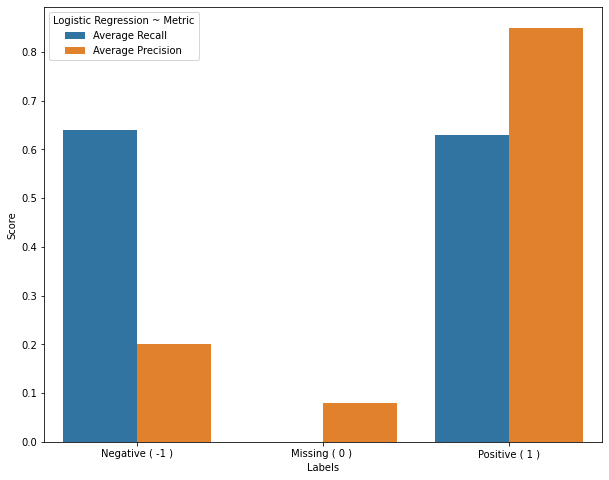

In [0]:
x=["Negative ( -1 )","Missing ( 0 ) ","Positive ( 1 )"]
y=[0.64,0.0,0.63] #average recall
p=[0.2,0.08,0.85]


asd=pd.DataFrame(zip(x*3, ["Average Recall"]*3+["Average Precision"]*3, y+p), columns=["Labels", "Logistic Regression ~ Metric", "Score"])

plt.figure(figsize=(10, 8))
fig=sns.barplot(x="Labels",hue="Logistic Regression ~ Metric",y="Score",data=asd)
#fig.show()
fig.figure.savefig(main_path+'others/logistic.jpg')

In [0]:
asd


,Labels,Metric,data
0,Negative ( -1 ),Average Recall,0.32
1,Missing ( 0 ),Average Recall,0.17
2,Positive ( 1 ),Average Recall,0.60
3,Negative ( -1 ),Average Precision,0.16
4,Missing ( 0 ),Average Precision,0.13
5,Positive ( 1 ),Average Precision,0.80


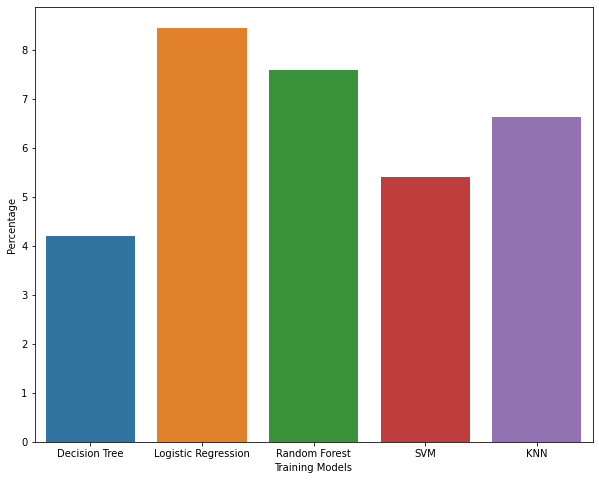

In [0]:
x=["Decision Tree","Logistic Regression","Random Forest","SVM","KNN"]
y=[4.2,8.46,7.6,5.4,6.63] #average TP Negatives



asd=pd.DataFrame(zip(x*1, y), columns=["Training Models", "Percentage"])

plt.figure(figsize=(10, 8))
fig=sns.barplot(x="Training Models",y="Percentage",data=asd,label="Help")
#fig.show()
#fig.figure.savefig(main_path+'others/Negativity.jpg')